# Metadata

```
Course:   DS 5001 
Module:   01 Lab
Topic:    First Foray
Author:   R.C. Alvarado

Purpose:  We take a raw text file from Project Gutenberg and convert it into a dataframe of tokens. We then explore some properties of the data. The main idea is to get acquainted with the primary process of convert text into analytical form.
```

# Set Up

In [1]:
data_home = '../data'

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
sns.set()

# Import File

In [4]:
src_file = f'{data_home}/gutenberg/pg105.txt'

In [5]:
lines = open(src_file, 'r').readlines()

In [6]:
lines[:5]

['\ufeffThe Project Gutenberg EBook of Persuasion, by Jane Austen\n',
 '\n',
 'This eBook is for the use of anyone anywhere at no cost and with\n',
 'almost no restrictions whatsoever.  You may copy it, give it away or\n',
 're-use it under the terms of the Project Gutenberg License included\n']

In [7]:
lines[-5:]

['\n',
 'This Web site includes information about Project Gutenberg-tm,\n',
 'including how to make donations to the Project Gutenberg Literary\n',
 'Archive Foundation, how to help produce our new eBooks, and how to\n',
 'subscribe to our email newsletter to hear about new eBooks.\n']

# Convert to Dataframe

In [97]:
text = pd.DataFrame(lines, columns=['line_str'])

In [99]:
text.shape

(8734, 1)

In [98]:
text

,line_str
0,"﻿The Project Gutenberg EBook of Persuasion, by..."
1,\n
2,This eBook is for the use of anyone anywhere a...
3,almost no restrictions whatsoever. You may co...
4,re-use it under the terms of the Project Guten...
...,...
8729,\n
8730,This Web site includes information about Proje...
8731,including how to make donations to the Project...
8732,"Archive Foundation, how to help produce our ne..."


In [14]:
text.index.name = 'line_num'

In [15]:
text.head()

,line_str
line_num,
0,"﻿The Project Gutenberg EBook of Persuasion, by..."
1,\n
2,This eBook is for the use of anyone anywhere a...
3,almost no restrictions whatsoever. You may co...
4,re-use it under the terms of the Project Guten...


# Extract Some Features

In [16]:
text['n_chars'] = text.line_str.str.len()

In [17]:
text['n_tokens'] = text.line_str.apply(lambda x: len(x.split()))

In [18]:
# text['char_token_ratio'] = round(text.n_chars / (text.n_tokens + 1), 2)

In [19]:
text.head()

,line_str,n_chars,n_tokens
line_num,,,
0,"﻿The Project Gutenberg EBook of Persuasion, by...",59,9
1,\n,1,0
2,This eBook is for the use of anyone anywhere a...,65,14
3,almost no restrictions whatsoever. You may co...,69,12
4,re-use it under the terms of the Project Guten...,68,11


# Explore

In [20]:
text.describe().T

,count,mean,std,min,25%,50%,75%,max
n_chars,8734.0,55.673575,25.340390,1.0,61.0,68.0,71.0,74.0
n_tokens,8734.0,9.881727,4.818982,0.0,9.0,12.0,13.0,19.0


Why is the n_chars max 74?

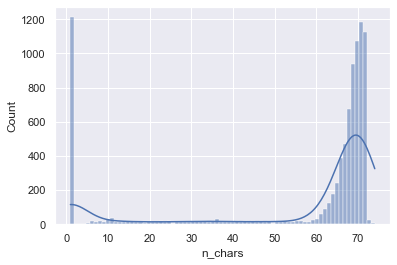

In [22]:
sns.histplot(data=text.n_chars, kde=True);

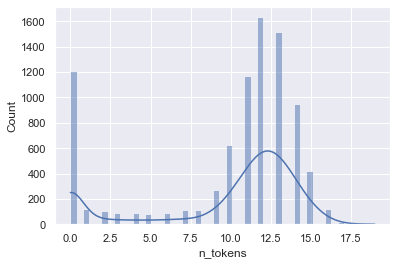

In [23]:
sns.histplot(data=text.n_tokens, kde=True);

In [24]:
# sns.histplot(data=text.char_token_ratio, kde=True);

**Why two humps?** What might this bimodal distribution indicate?

Let's look at the first hump for characters.

In [25]:
text[text['n_chars'] < 5].sort_values('n_chars', ascending=False).sample(10)

,line_str,n_chars,n_tokens
line_num,,,
4248,\n,1,0
2367,\n,1,0
5651,\n,1,0
44,\n,1,0
5204,\n,1,0
6267,\n,1,0
3139,\n,1,0
7409,\n,1,0
5537,\n,1,0


**The statistical pattern reflects document structure** -- the first mode of the distribution represents
paragraphs breaks. So, let's encode that.

# Import Again

Now that we know what line breaks mean, we can use this information to import the file with a more accurate structure. Note also that we could have inferred this from visual inspection, too. But the principle that statistical features can provide evidence for structure remains -- we will use this throughout the course.

## Interpret line breaks `\n`

In [26]:
chunk_pat = '\n\n'

In [27]:
chunks = open(src_file, 'r').read().split(chunk_pat)

In [28]:
text = pd.DataFrame(chunks, columns=['chunk_str'])
text.index.name = 'chunk_id'

In [29]:
text.head()

,chunk_str
chunk_id,
0,"﻿The Project Gutenberg EBook of Persuasion, by..."
1,This eBook is for the use of anyone anywhere a...
2,\nTitle: Persuasion
3,Author: Jane Austen
4,"Release Date: June 5, 2008 [EBook #105]\nLast ..."


In [30]:
text.shape

(1132, 1)

## Remove remaining breaks

In [31]:
text.chunk_str = text.chunk_str.str.replace('\n+', ' ', regex=True).str.strip()

In [32]:
text.head()

,chunk_str
chunk_id,
0,"﻿The Project Gutenberg EBook of Persuasion, by..."
1,This eBook is for the use of anyone anywhere a...
2,Title: Persuasion
3,Author: Jane Austen
4,"Release Date: June 5, 2008 [EBook #105] Last U..."


# Convert Lines to Tokens

`K: A dataframe of tokens`

**Why preserve blank lines?**

* They contain structural information
* They allow you to reconstruct the original

In [68]:
K = text.chunk_str.str.split(' ', expand=True).stack().to_frame('token_str')
K.index.names = ['chunk_num','token_num']

In [70]:
K.shape

(88958, 1)

In [34]:
# Broken down into steps

In [34]:
# text.chunk_str.str.split(' ')

In [35]:
# text.chunk_str.str.split(' ', expand=True)

In [36]:
# text.chunk_str.str.split(' ', expand=True).stack()

In [37]:
# text.chunk_str.str.split(' ', expand=True).stack().to_frame('token_str')

In [77]:
K.head()

token_str
chunk_num token_num           
0         0               ﻿The
          1            Project
          2          Gutenberg
          3              EBook
          4                 of

In [75]:
K.iloc[100:120, :]

token_str
chunk_num token_num                
14        0                      by
15        0                    Jane
          1                  Austen
16        0                  (1818)
17        0                        
18        0                 Chapter
          1                       1
19        0                     Sir
          1                  Walter
          2                 Elliot,
          3                      of
          4                Kellynch
          5                   Hall,
          6                      in
          7          Somersetshire,
          8                     was
          9                       a
          10                    man
          11                   who,
          12                    for

# Do Some Cleaning

In [85]:
K['term_str'] = K.token_str.str.replace(r'\W+', '', regex=True).str.lower()

In [86]:
K.sample(10)

,,token_str,term_str
chunk_num,token_num,,
532,135,allowed,allowed
171,21,and,and
624,94,the,the
239,57,society,society
37,40,could,could
676,41,Byron;,byron
646,133,himself,himself
191,11,about,about
112,219,information,information


# Extract a Vocabulary

`v: A table of terms` (As opposed to tokens, which are term _instances_.)

In [87]:
# K.term_str.value_counts()

In [88]:
V = K.term_str.value_counts().to_frame('n')
V.index.name = 'term_str'

In [89]:
V

,n
term_str,
the,3501
to,2862
and,2851
of,2684
,2667
...,...
acknowledgements,1
gapes,1
lieve,1


# Word Frequency Graphs

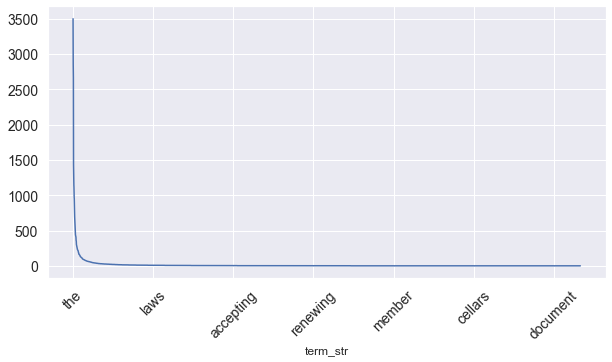

In [90]:
V.plot(figsize=(10,5), fontsize=14, rot=45, legend=False);

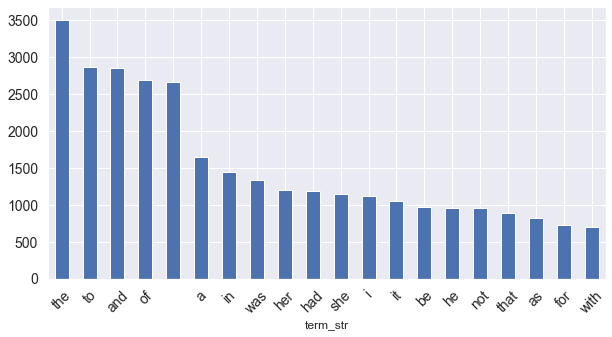

In [91]:
V.head(20).plot.bar(figsize=(10, 5), fontsize=14, rot=45, legend=False);

# The The

Why is "the" the most frequent word?

Consider that "the" is "[The Most Powerful Word in the English Language](http://www.bbc.com/culture/story/20200109-is-this-the-most-powerful-word-in-the-english-language)."

> ... ‘the’ lies at the heart of English grammar, having a function rather than a meaning. Words are split into two categories: expressions with a semantic meaning and functional words like ‘the’, ‘to’, ‘for’, with a job to do. ‘The’ can function in multiple ways. This is typical, explains Gary Thoms, assistant professor in linguistics at New York University: “a super high-usage word will often develop a real flexibility”, with different subtle uses that make it hard to define. Helping us understand what is being referred to, ‘the’ makes sense of nouns as a subject or an object. So even someone with a rudimentary grasp of English can tell the difference between ‘I ate an apple’ and ‘I ate the apple’.

Note: function vs. meaning ...

> **Function words are very specific to each language.**<br/><br/>
So, someone who is a native Hindi or Russian speaker is going to have to think very differently when constructing a sentence in English. Murphy says that she has noticed, for instance, that sometimes her Chinese students hedge their bets and include ‘the’ where it is not required. Conversely, Smith describes Russian friends who are so unsure when to use ‘the’ that they sometimes leave a little pause: ‘I went into... bank. I picked up... pen.’ English speakers learning a language with no equivalent of ‘the’ also struggle and might overcompensate by using words like ‘this’ and ‘that’ instead.

"The" is a _function word_ in English, and is often dismissed as a _stop word_, that as noise. Is this a good idea?

# Word Dispersion Plots

In [92]:
def word_plot(term_str):
    global K
    term_str = term_str.lower()
    (K.term_str == term_str)\
        .reset_index(drop=True).astype('int')\
        .to_frame(term_str)\
        .plot(figsize=(20, .5), legend=False, title=term_str)

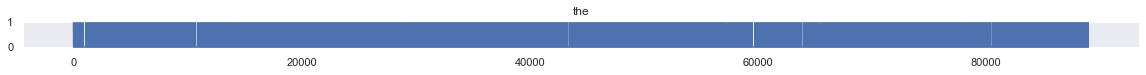

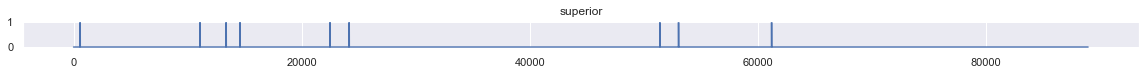

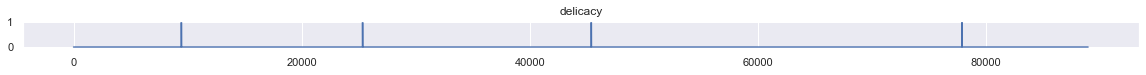

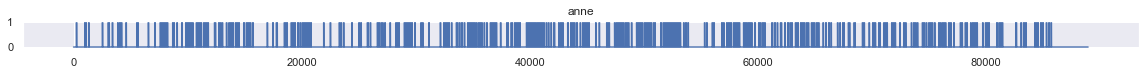

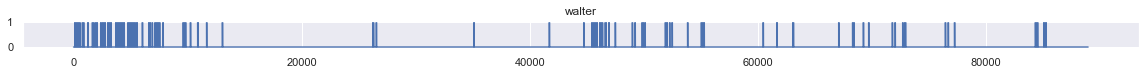

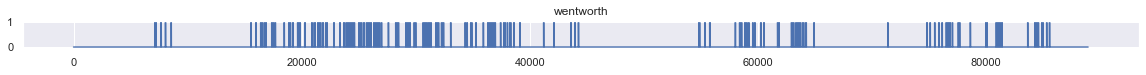

In [93]:
word_plot('the')
word_plot('superior')
word_plot('delicacy')
word_plot('anne')
word_plot('walter')
word_plot('wentworth')